In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

sample_image = x_test_noisy[0:1]
denoised_image = autoencoder.predict(sample_image)

Epoch 1/10
469/469 [==============================] - 201s 423ms/step - loss: 0.1568 - val_loss: 0.1120
Epoch 2/10
469/469 [==============================] - 194s 413ms/step - loss: 0.1089 - val_loss: 0.1043
Epoch 3/10
469/469 [==============================] - 193s 411ms/step - loss: 0.1039 - val_loss: 0.1019
Epoch 4/10
469/469 [==============================] - 197s 419ms/step - loss: 0.1014 - val_loss: 0.0998
Epoch 5/10
469/469 [==============================] - 193s 411ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 6/10
469/469 [==============================] - 189s 404ms/step - loss: 0.0988 - val_loss: 0.0975
Epoch 7/10
469/469 [==============================] - 186s 396ms/step - loss: 0.0979 - val_loss: 0.0969
Epoch 8/10
469/469 [==============================] - 186s 397ms/step - loss: 0.0971 - val_loss: 0.0961
Epoch 9/10
469/469 [==============================] - 182s 387ms/step - loss: 0.0965 - val_loss: 0.0955
Epoch 10/10
1/1 [==============================] - 0s 135ms/step

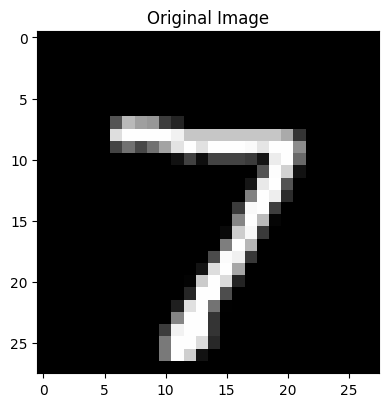

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(x_test[0], cmap='gray')

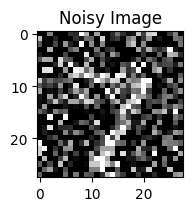

In [ ]:
plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(x_test_noisy[0].reshape(28, 28), cmap='gray')

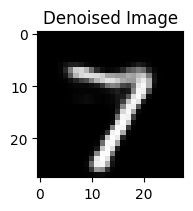

In [ ]:
plt.subplot(1, 3, 3)
plt.title('Denoised Image')
plt.imshow(denoised_image[0].reshape(28, 28), cmap='gray')
plt.show()